In [7]:
# %matplotlib notebook
%matplotlib inline
from ipynb_setup import *
import sys
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd

import os
import re
from pathlib import Path

In [8]:
sns.set_style("whitegrid")

In [12]:
base_path = Path("/home/c817h/Documents/logs_cluster/activelearning/cifar100/active-cifar100_low/basic-pretrained_model-resnet_drop-0.5_aug-cifar_randaugment_acq-bald_ep-80_freeze-False_smallhead-False")
# base_path = Path("/home/c817h/network/Cluster-Experiments/activelearning/miotcd/active-miotcd_low/basic-pretrained_model-resnet_drop-0.5_aug-imagent_randaug_acq-bald_ep-80_freeze-False_smallhead-False")
df = []
for i,path in enumerate(base_path.iterdir()):
    if path.is_dir():
        try:
            df.append(pd.read_csv(path/"analysis_comp.csv"))
        except:
            pass
df = pd.concat(df)
df = df.reset_index()

In [13]:
df.columns

Index(['index', 'Unnamed: 0', 'MI', 'Entropy', 'Failure Label',
       'Batch Distance', 'Minimum Batch Distance', 'Cluster Distance',
       'Maximum Cluster Distance', 'Cluster Distance Scaled',
       'Maximum Cluster Distance Scaled', 'MI Scaled', 'Entropy Scaled',
       'Acquisition', 'Num_Labels', 'Experiment'],
      dtype='object')

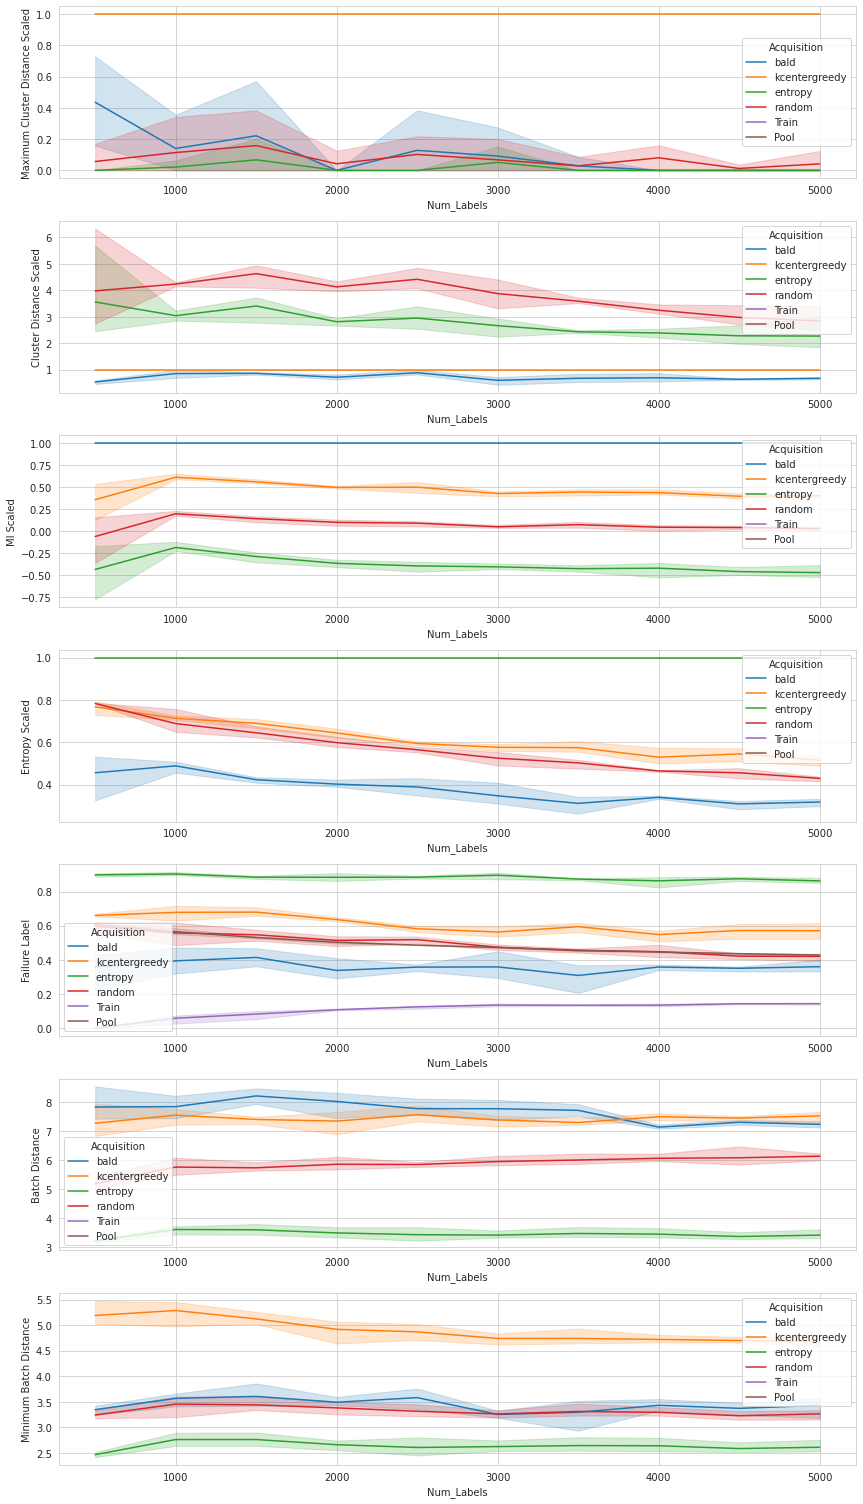

In [14]:
vals = ["Maximum Cluster Distance Scaled", "Cluster Distance Scaled", "MI Scaled", "Entropy Scaled", "Failure Label", "Batch Distance", "Minimum Batch Distance"]
fig, axs = plt.subplots(len(vals))
for i, y in enumerate(vals):
    sns.lineplot(ax=axs[i], data=df, hue="Acquisition", x="Num_Labels", y=y)
fig.set_size_inches(12, 3*len(vals))
fig.tight_layout()
plt.show()
    
        
    

In [15]:
# path = Path("/home/c817h/Documents/logs_cluster/activelearning/cifar100/active-cifar100_low/basic-pretrained_model-resnet_drop-0.5_aug-cifar_randaugment_acq-bald_ep-80_freeze-False_smallhead-False/2022-09-04_18-09-26-614997/analysis.csv")
path = Path("/home/c817h/network/Cluster-Experiments/activelearning/isic2019/active-isic19_high/basic-pretrained_model-resnet_drop-0.5_aug-isic_randaugment_acq-bald_ep-80_freeze-False_smallhead-False/2022-09-07_04-24-45-344474/analysis_comp.csv")
df = pd.read_csv(path)



In [16]:
df

,Unnamed: 0,MI,Entropy,Failure Label,Batch Distance,Minimum Batch Distance,Cluster Distance,Maximum Cluster Distance,Cluster Distance Scaled,Maximum Cluster Distance Scaled,MI Scaled,Entropy Scaled,Acquisition,Num_Labels,Experiment
0,0,0.345876,1.468229,0.647500,18.130971,9.179546,9.537475,21.628626,0.593848,0.443882,1.000000,0.559299,bald,800,2022-09-07_04-24-45-344474
1,1,0.224283,1.117752,0.477500,20.355121,13.695416,9.348766,12.168955,1.000000,1.000000,0.384687,0.052364,kcentergreedy,800,2022-09-07_04-24-45-344474
2,2,0.229794,1.772914,0.737500,13.272172,8.054296,9.532899,29.179141,0.603697,-0.000000,0.412574,1.000000,entropy,800,2022-09-07_04-24-45-344474
3,3,0.160691,1.186650,0.451250,14.683839,9.682848,9.327226,25.370189,1.046359,0.223922,0.062883,0.152020,random,800,2022-09-07_04-24-45-344474
4,4,0.148265,1.081549,0.246250,NaN,NaN,9.813392,29.179141,NaN,NaN,NaN,NaN,Train,800,2022-09-07_04-24-45-344474
5,5,0.159702,1.154939,0.410764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pool,800,2022-09-07_04-24-45-344474
6,6,0.224173,1.487498,0.445000,16.611190,9.339678,8.954465,20.329598,0.470302,-0.000000,1.000000,0.281974,bald,1600,2022-09-07_04-24-45-344474
7,7,0.147872,1.146073,0.373750,18.095772,12.562926,8.752455,11.205196,1.000000,1.000000,-0.238157,-0.378105,kcentergreedy,1600,2022-09-07_04-24-45-344474
8,8,0.143087,1.858896,0.676250,12.031419,7.307911,8.947815,20.329598,0.487739,-0.000000,-0.315795,1.000000,entropy,1600,2022-09-07_04-24-45-344474
9,9,0.124306,1.316438,0.386250,14.009433,9.221442,8.751475,20.329598,1.002570,-0.000000,-0.620563,-0.048738,random,1600,2022-09-07_04-24-45-344474


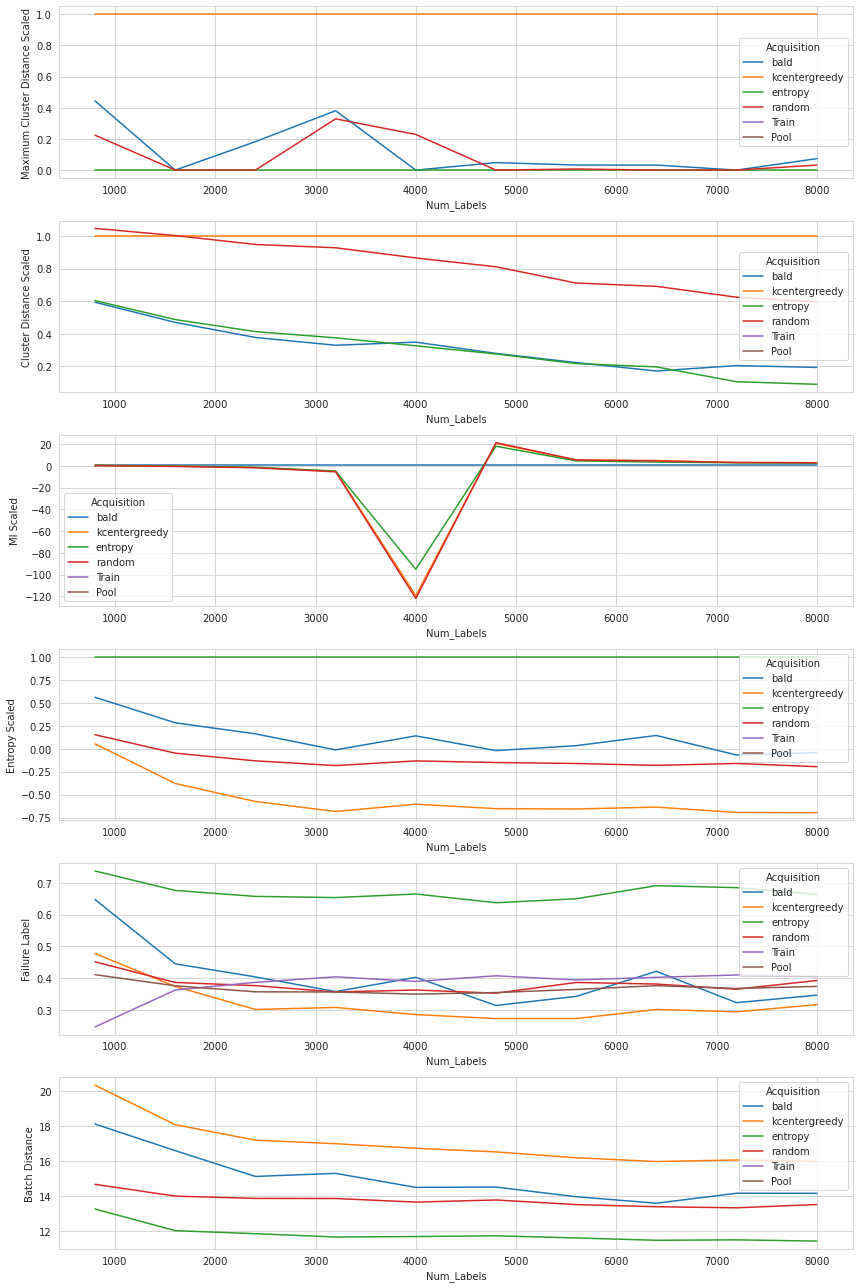

In [17]:
vals = ["Maximum Cluster Distance Scaled", "Cluster Distance Scaled", "MI Scaled", "Entropy Scaled", "Failure Label", "Batch Distance"]
fig, axs = plt.subplots(len(vals))
for i, y in enumerate(vals):
    sns.lineplot(ax=axs[i], data=df, hue="Acquisition", x="Num_Labels", y=y)
fig.set_size_inches(12, 3*len(vals))
fig.tight_layout()
plt.show()

In [58]:
path = Path("/home/c817h/Documents/logs_cluster/activelearning/cifar100/active-cifar100_low/basic-pretrained_model-resnet_drop-0.5_aug-cifar_randaugment_acq-bald_ep-80_freeze-False_smallhead-False/2022-09-04_18-09-26-614997/analysis_comp.csv")
df = pd.read_csv(path)

In [59]:
df

,Unnamed: 0,MI,Entropy,Failure Label,Batch Distance,Minimum Batch Distance,Cluster Distance,Maximum Cluster Distance,Cluster Distance Scaled,Maximum Cluster Distance Scaled,MI Scaled,Entropy Scaled,Acquisition,Num_Labels,Experiment
0,0,0.198955,2.630856,0.428000,7.516596,3.423085,4.034229,7.037840,0.550102,0.158464,1.000000,0.489502,bald,500,2022-09-04_18-09-26-614997
1,1,0.122938,3.717601,0.656000,7.027443,5.071102,3.852972,4.817309,1.000000,1.000000,0.407586,0.779400,kcentergreedy,500,2022-09-04_18-09-26-614997
2,2,0.024053,4.544565,0.906000,3.201575,2.455804,3.267912,7.455972,2.452175,-0.000000,-0.363040,1.000000,entropy,500,2022-09-04_18-09-26-614997
3,3,0.075203,3.733761,0.602000,5.161543,3.219861,3.153802,6.415354,2.735408,0.394373,0.035579,0.783711,random,500,2022-09-04_18-09-26-614997
4,4,0.070637,0.795858,0.000000,NaN,NaN,4.255858,7.455972,NaN,NaN,NaN,NaN,Train,500,2022-09-04_18-09-26-614997
5,5,0.072904,3.783002,0.611258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pool,500,2022-09-04_18-09-26-614997
6,6,0.186522,2.694363,0.472000,7.433588,3.409349,3.476270,6.314193,0.875680,0.356609,1.000000,0.500687,bald,1000,2022-09-04_18-09-26-614997
7,7,0.135007,3.452682,0.688000,7.209998,4.972708,3.463175,4.692725,1.000000,1.000000,0.594981,0.707315,kcentergreedy,1000,2022-09-04_18-09-26-614997
8,8,0.030487,4.526829,0.898000,3.423260,2.633547,3.268078,7.212917,2.852186,-0.000000,-0.226762,1.000000,entropy,1000,2022-09-04_18-09-26-614997
9,9,0.079985,3.358109,0.548000,5.321301,3.230924,3.136766,7.021045,4.098831,0.076134,0.162399,0.681545,random,1000,2022-09-04_18-09-26-614997


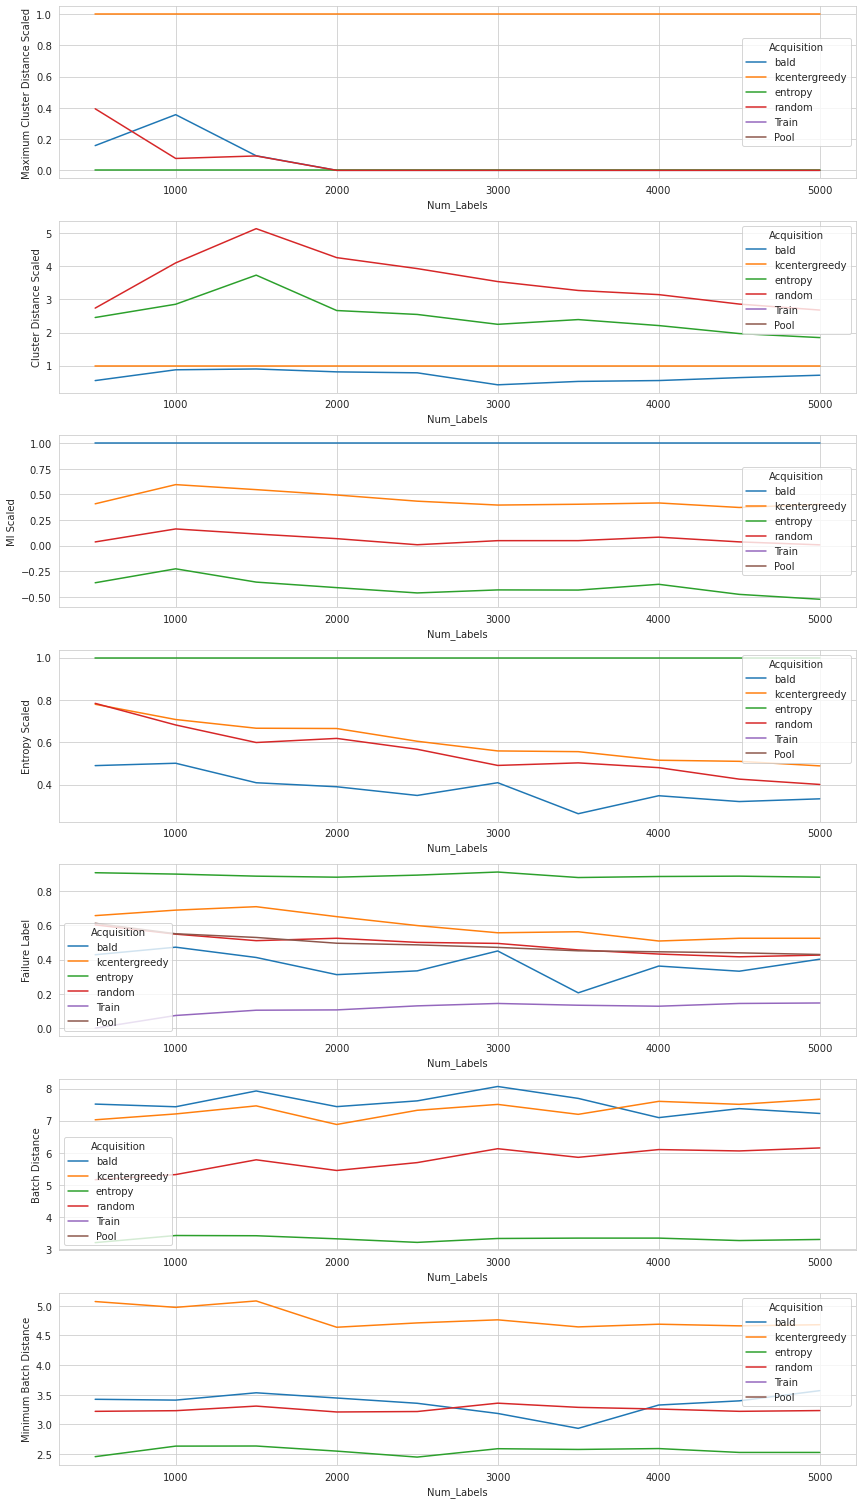

In [60]:
vals = ["Maximum Cluster Distance Scaled", "Cluster Distance Scaled", "MI Scaled", "Entropy Scaled", "Failure Label", "Batch Distance", "Minimum Batch Distance"]
fig, axs = plt.subplots(len(vals))
for i, y in enumerate(vals):
    sns.lineplot(ax=axs[i], data=df, hue="Acquisition", x="Num_Labels", y=y)
fig.set_size_inches(12, 3*len(vals))
fig.tight_layout()
plt.show()
    
        

In [55]:
df.head(59)

,index,Unnamed: 0,MI,Entropy,Failure Label,Batch Distance,Minimum Batch Distance,Cluster Distance,Maximum Cluster Distance,Cluster Distance Scaled,Maximum Cluster Distance Scaled,MI Scaled,Entropy Scaled,Acquisition,Num_Labels,Experiment
0,0,0,0.198955,2.630856,0.428000,7.516596,3.423085,4.034229,7.037840,0.550102,0.158464,1.000000,0.489502,bald,500,2022-09-04_18-09-26-614997
1,1,1,0.122938,3.717601,0.656000,7.027443,5.071102,3.852972,4.817309,1.000000,1.000000,0.407586,0.779400,kcentergreedy,500,2022-09-04_18-09-26-614997
2,2,2,0.024053,4.544565,0.906000,3.201575,2.455804,3.267912,7.455972,2.452175,-0.000000,-0.363040,1.000000,entropy,500,2022-09-04_18-09-26-614997
3,3,3,0.198955,2.630856,0.428000,7.516596,3.423085,4.034229,7.037840,0.550102,0.158464,1.000000,0.489502,random,500,2022-09-04_18-09-26-614997
4,4,4,0.070637,0.795858,0.000000,NaN,NaN,4.255858,7.455972,NaN,NaN,NaN,NaN,Train,500,2022-09-04_18-09-26-614997
5,5,5,0.072904,3.783002,0.611258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pool,500,2022-09-04_18-09-26-614997
6,6,6,0.186522,2.694363,0.472000,7.433588,3.409349,3.476270,6.314193,0.875680,0.356609,1.000000,0.500687,bald,1000,2022-09-04_18-09-26-614997
7,7,7,0.135007,3.452682,0.688000,7.209998,4.972708,3.463175,4.692725,1.000000,1.000000,0.594981,0.707315,kcentergreedy,1000,2022-09-04_18-09-26-614997
8,8,8,0.030487,4.526829,0.898000,3.423260,2.633547,3.268078,7.212917,2.852186,-0.000000,-0.226762,1.000000,entropy,1000,2022-09-04_18-09-26-614997
9,9,9,0.186522,2.694363,0.472000,7.433588,3.409349,3.476270,6.314193,0.875680,0.356609,1.000000,0.500687,random,1000,2022-09-04_18-09-26-614997
